The dataset we are using is Laptop Specifications and their prices, Our goal is to predict the price of a laptop

In this notebook, I have predicted the price using 3 different models
1. Random Forest Regressor
2. Locally Weighted Linear Regressor
3. Artificial Neural Network implemented using PyTorch


Prior to predicting using a model, I have done sufficient amount of Data preprocessing and data analysis to learn trends in the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import files
uploaded=files.upload()


Saving laptop_data.csv to laptop_data.csv


In [2]:
import io
df=pd.read_csv(io.BytesIO(uploaded['laptop_data.csv']))
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
print(df.shape)
df.info()

(1303, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [4]:
df.isnull()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()


Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


We create a distplot for Prices to see the variation in prices.

<ipython-input-8-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

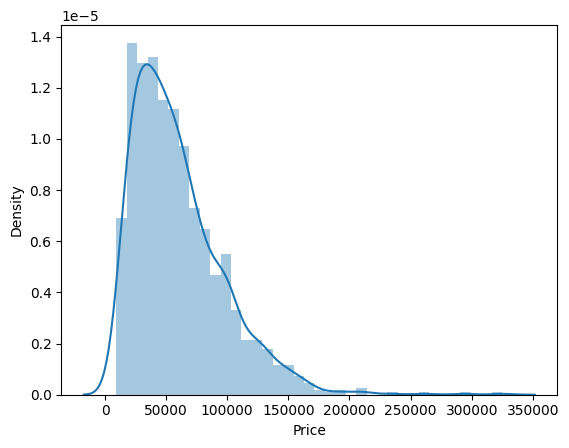

In [8]:
sns.distplot(df['Price'])

<Axes: >

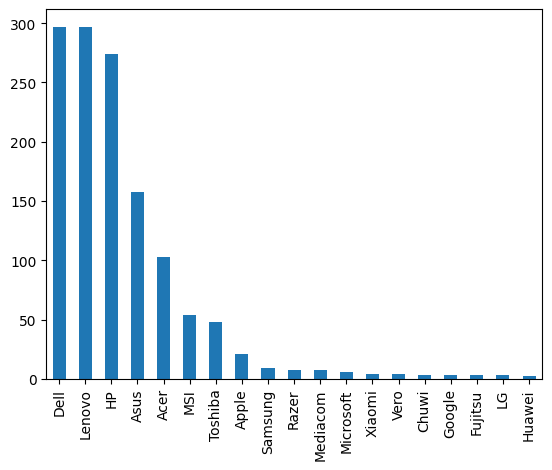

In [9]:
#Comparing Company and Price

df['Company'].value_counts().plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

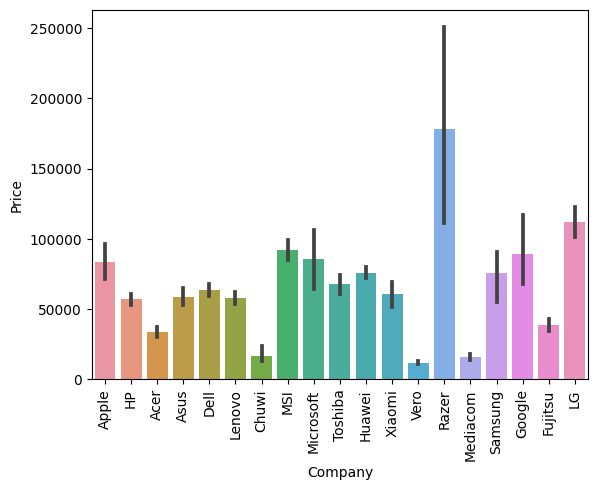

In [10]:
sns.barplot(x=df['Company'],y=df['Price'])
#to make sure we can read the names of laptop companies clearly
plt.xticks(rotation='vertical')

From the above barplot,we see that Razer laptops are most expensive and most laptop companies price their laptops in the neighborhood of 50k to 1L

<Axes: >

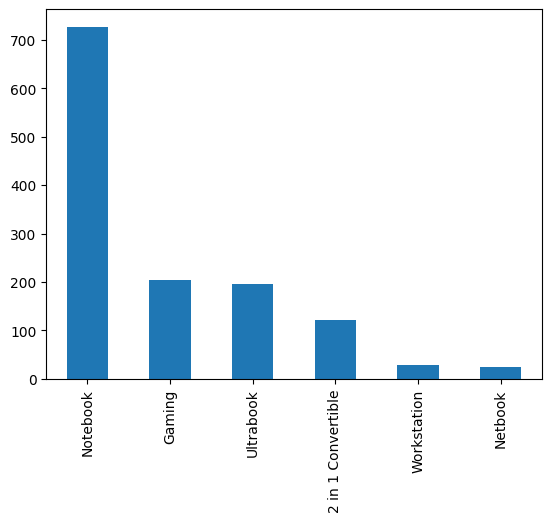

In [11]:
#We do the same comparison for TypeName column as well
df['TypeName'].value_counts().plot(kind='bar')


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

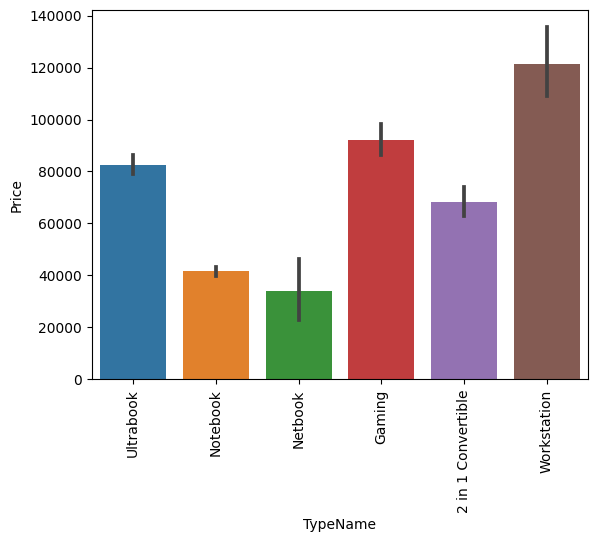

In [12]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')

Clearly, Workstations are most expensive,Gaming laptop are second most expensive which is logical due to their powerful components.

<ipython-input-13-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

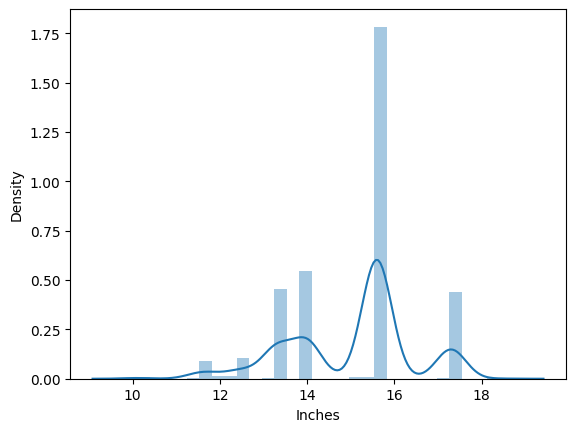

In [13]:
sns.distplot(df['Inches'])

In [14]:
df.corr()['Price']

<ipython-input-14-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches    0.068197
Price     1.000000
Name: Price, dtype: float64

ScreenResolution Column on closer observation has a lot of information. Relevant information that can be extracted from ScreenResolution are :

1. Whether they have touchscreen feature or not
2. Whether it has an IPS panel or not 
3. Screen resolution or size, (1920x1080 etc)

In [15]:
df['ScreenResolution'].value_counts()


Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [16]:
#Naturally, we know the presence of a TouchScreen will increase the price definitely, so we will 
#create a new value which shows whether the particular laptop has a Touchscreen or not

df['touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.head(20)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,0
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016,0
7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360,0
8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000,0


<Axes: xlabel='touchscreen', ylabel='Price'>

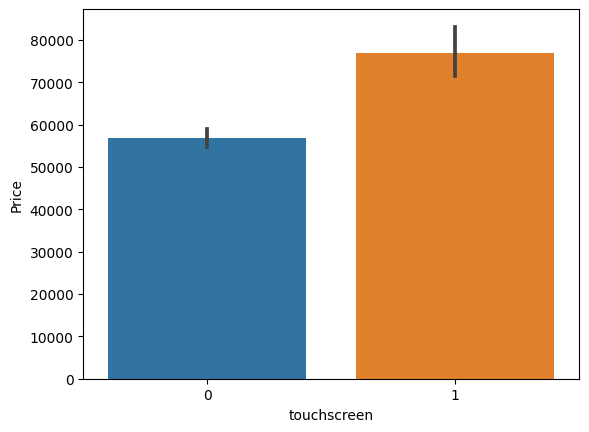

In [17]:
#Now we anaylze our new attribute which is TouchScreen

sns.barplot(x=df['touchscreen'],y=df['Price'])


What is an IPS Monitor? (IPS Monitor Technology) IPS monitors or “In-Plane Switching” monitors, leverage liquid crystals aligned in parallel to produce rich colors. IPS panels are defined by the shifting patterns of their liquid crystals. These monitors were designed to overcome the limitations of TN panels


*Basically if they are LCD or not in a sense*

In [18]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1


<Axes: xlabel='Ips', ylabel='Price'>

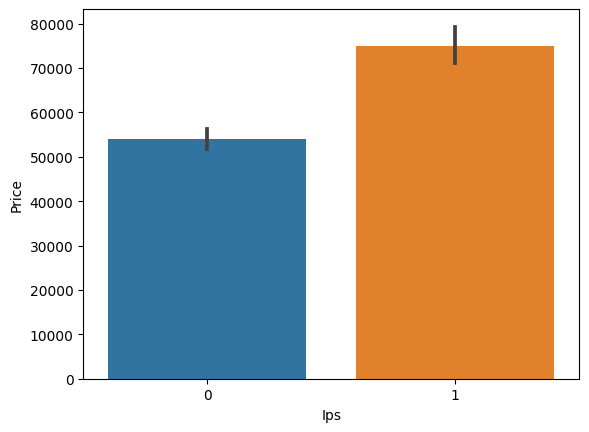

In [19]:
sns.barplot(x=df['Ips'],y=df['Price'])

We see that presence of an IPS results in higher price for the laptop

In [20]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1


Now we extract the resolution from the column data

In [21]:
#the second number can be easily obtained by splitting the whole string in ScreenResolution
#using split function

temp=df['ScreenResolution'].str.split('x',n=1,expand=True)
df['X']=temp[0] #have to extract res from this column later
df['Y']=temp[1]



In [22]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,X,Y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [23]:

df['X']=df['X'].str.extract('(\d+)')


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X                 1303 non-null   object 
 14  Y                 1303 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 152.8+ KB


X and Y are objects, we need them as integers

In [25]:
df['X']=df['X'].astype('int32')
df['Y']=df['Y'].astype('int32')

In [26]:
df.corr()['Price']

<ipython-input-26-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Price          1.000000
touchscreen    0.191226
Ips            0.252208
X              0.083832
Y              0.552809
Name: Price, dtype: float64

<ipython-input-27-326882a9e6b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  w=df.corr()


<Axes: >

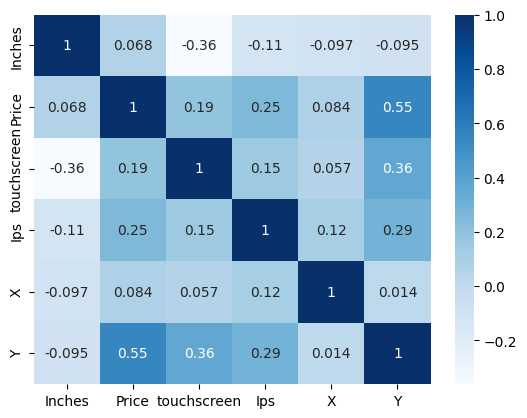

In [27]:
#we compare correlations of all columns with each other

w=df.corr()
sns.heatmap(w,annot=True,cmap='Blues')

This dataset is quite common and sometimes, rather than dropping a particular column, we just add that data to some other column. or combine two or more columns to make a new column which will have a decent correlation with the dependent variable


Here, in this dataset, we see that Inches does not have much correlation with Price, so we can drop Inches column. But if we see carefully, X and Y are essentially dimensions of the screen. We can calculate PPI or Pixels per Inch using these 3 attributes

I got the idea to use PPI when I was doing a ML course. The same was done there.


In [28]:
df['PPI']=(((df['X']**2+df['Y']**2))**0.5/df['Inches']).astype('float')

In [29]:
df.drop(columns=['ScreenResolution','X','Y'],inplace=True)


In [30]:
df.drop(columns=['Inches'],inplace=True)

In [31]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005


We are done with feature extraction and engineering of ScreenResolution here.

We move on to CPU

So in CPU also, we have various companies like Intel AMD etc making CPU's
According to current market and just looking at prices, the Ghz ie speed does not really vary as much within the same brand as in Intel i5 1.8Ghz and Intel i5 2.5Ghz doesn't have a profound effect on the pricing of laptop, other features like RAM do .

We extract just the name of processor from CPU column

In [32]:
df['Cpu']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [33]:
def processor(t):
    if t=='Intel Core i7' or t=='Intel Core i5' or t=='Intel Core i3':
        return t
    else:
        if t.split()[0]=='Intel':
            return 'Other Intel processor'
        else:
            return 'AMD processor'

In [34]:
df['CPU_brand']=df['Cpu'].apply(processor)

In [35]:
df.head(15)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,PPI,CPU_brand
0,Apple,Ultrabook,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5
5,Acer,Notebook,AMD A9-Series 9420,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,0,0,100.454670,AMD processor
6,Apple,Ultrabook,Intel Core i7,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016,0,1,220.534624,Intel Core i7
7,Apple,Ultrabook,Intel Core i5,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360,0,0,127.677940,Intel Core i5
8,Asus,Ultrabook,Intel Core i7,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000,0,0,157.350512,Intel Core i7
9,Acer,Ultrabook,Intel Core i5,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000,0,1,157.350512,Intel Core i5


In [36]:
df['CPU_brand'].value_counts()


Intel Core i7            527
Intel Core i5            423
Other Intel processor    154
Intel Core i3            136
AMD processor             63
Name: CPU_brand, dtype: int64

We see that Intel Core i7 and i5 are most common and popular amongst buyers

In [37]:
df.drop(columns=['Cpu'],inplace=True)

In [38]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,PPI,CPU_brand
0,Apple,Ultrabook,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,226.983005,Intel Core i5


<Axes: >

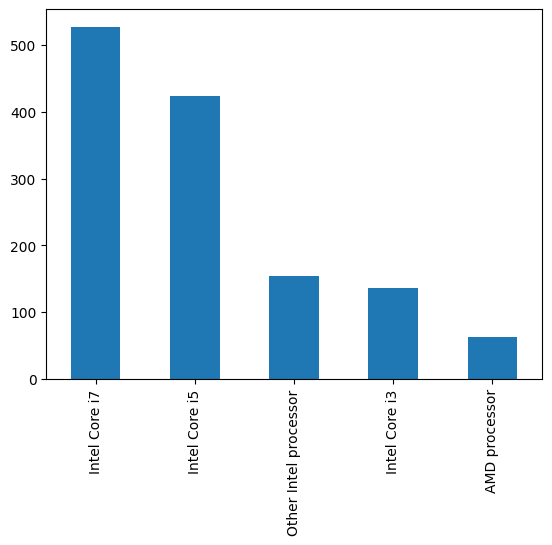

In [39]:
df['CPU_brand'].value_counts().plot(kind='bar')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel processor')])

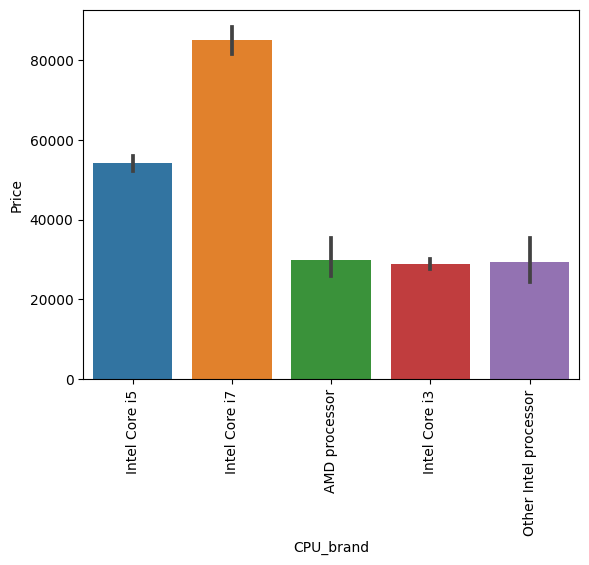

In [40]:
#we compare with price now
sns.barplot(x=df['CPU_brand'],y=df['Price'])
plt.xticks(rotation='vertical')

Intel Core i7 is quite new compared to others and more powerful, hence it makes sense that it is on the higher side when it comes to price.

In [41]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

We compare RAM with pricing

<Axes: xlabel='Ram', ylabel='Price'>

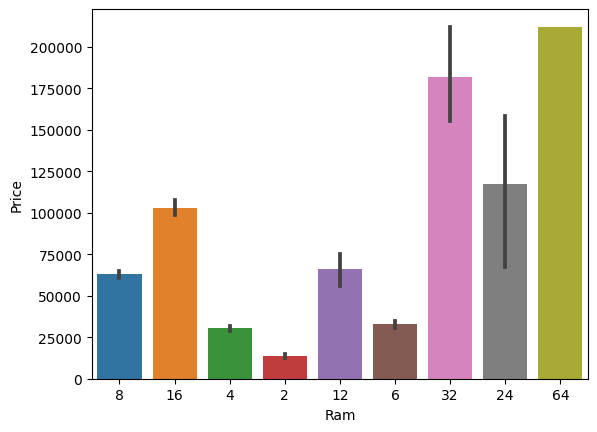

In [42]:
sns.barplot(x=df['Ram'],y=df['Price'])

Since we are going in order, we anaylze and extract relevant data from Memory column, but before that, we shall look into GPU Column and OpSys

**Gpu**

In [43]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

There are many types of GPU's and accomodating all of them is out of scope. We would require way more columns and processing such data would become difficult.

Therefore, we just fetch the brand name ie Intel, Nvidia ,AMD and so on.

In [44]:
df['GPU']=df['Gpu'].apply(lambda x:x.split()[0])

In [45]:
df['GPU'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: GPU, dtype: int64

Since there is only one GPU with processor ARM, we can choose to ignore it.
Hence we drop it

<Axes: xlabel='GPU', ylabel='Price'>

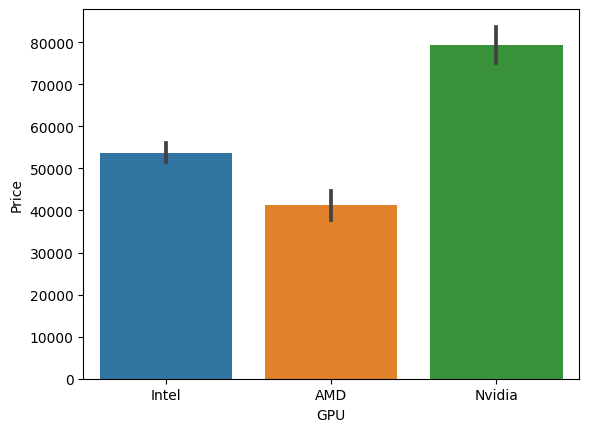

In [46]:
df=df[df['GPU']!='ARM']
sns.barplot(x=df['GPU'],y=df['Price'])

<ipython-input-47-05ee4c8848be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

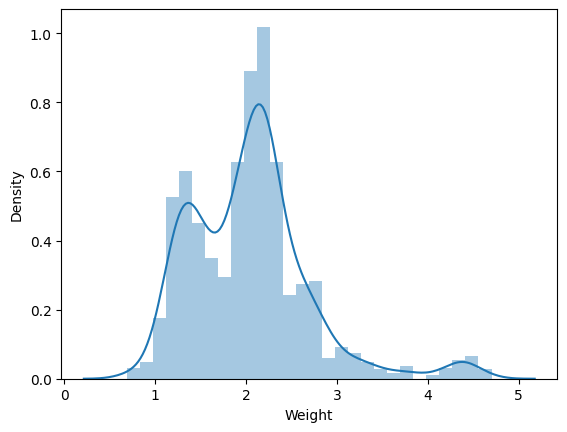

In [47]:
sns.distplot(df['Weight'])

Most laptops are in the 2kg ish region.

In [48]:
#OpSys

df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

There are many types of Operating Systems
but we can club them to Windows, Mac and others

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

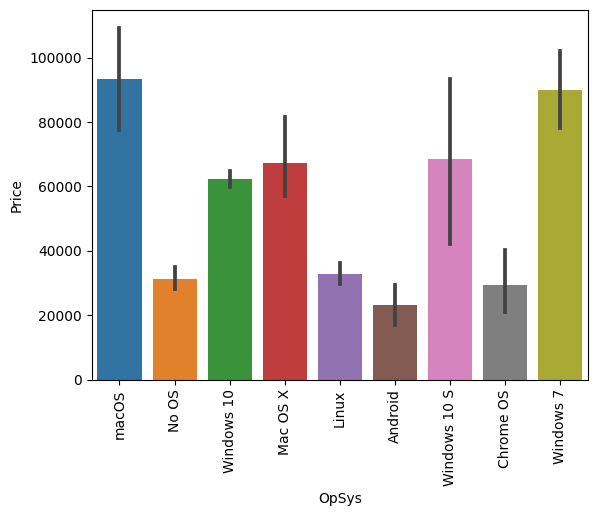

In [49]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')

From the barplot and value count,

1.   we see that non Windows and Mac os's are more or less at similar price range, so we can group all of those

2.   The number of variations of Windows: Windows 10 is most popular and the other versions like 7 and 10 S are very few in number compared to Windows 10, so we can group all of the Windows OpSys to one group as due to it being small in number (meaning windows 7 and 10S)



3.   Mac OS and Mac OS X are both quite less in number, so it is safe to assume both belong to same type of OS and we proceed with grouping these too.

*We use a function and apply it to our column and move ahead*




In [50]:
def opsystem(t):
    if t=='Windows 10' or t=='Windows 7' or t=='Windows 10 S':
        return 'Windows'
    elif t=='macOS' or t=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [51]:
df['OpS']=df['OpSys'].apply(opsystem)

In [52]:
df.drop(columns=['OpSys','Gpu'],inplace=True)

In [53]:
df['OpS'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: OpS, dtype: int64

In [54]:
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,touchscreen,Ips,PPI,CPU_brand,GPU,OpS
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac


Hence, now we have to do some feature engineering on Memory.


In [55]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

We see that there are many types of memory and various sizes as well for each.

Classifying them as HDD, SSD, Flash Storage and Hybrid, initalizing each column to 0 and then updating those values with correspondent sizes for each row will suffice. 

We are doing this as SSD is more expensive than others as it more faster (generally they are).

So I've decided to feature engineer Memory column


In [56]:
df['SSD']=0 
df['HDD']=0
df['FlashStore']=0
df['Hybrid']=0
df.head()

,Company,TypeName,Ram,Memory,Weight,Price,touchscreen,Ips,PPI,CPU_brand,GPU,OpS,SSD,HDD,FlashStore,Hybrid
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,0,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0,0,0
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux,0,0,0,0
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,0,0,0,0
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,0,0,0,0


This is essentially a function I have made which will make 4 new columns to denote SSD, HDD, FlashStorage and Hybrid memory capacities.

For Example, if memory is of the style 500GB SSD and 1TB HDD

SSD column will have 500 and HDD will have the value 1000

In [57]:

def process(x):
  splitted=x.split(' ')
  #To replace GB and TB and make them both GB and remove + signs

  for i in range(0,len(splitted)):
    w=splitted[i]
    w=w.replace('GB','')
    w=w.replace('TB','000')
    w=w.replace('.0','')
    w=w.replace('+','')
    splitted[i]=w

#Now we seperate them into columns
  a1,a2,a3,a4=0,0,0,0
  for i in range(0,len(splitted)):
    xx=splitted[i]
    if xx=='SSD':
      a1+=int(splitted[i-1])
    elif xx=='HDD':
      a2+=int(splitted[i-1])
    elif xx=='Storage': #jumping past flash to get to the value
      a3+=int(splitted[i-2])
    elif xx=='Hybrid':
      a4+=int(splitted[i-1])
    else:
      continue
  return a1,a2,a3,a4

  


In [58]:
for ind in df.index:
  gg=process(df['Memory'][ind])
  df['SSD'][ind],df['HDD'][ind],df['FlashStore'][ind],df['Hybrid'][ind]=gg

<ipython-input-58-cd4513069909>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SSD'][ind],df['HDD'][ind],df['FlashStore'][ind],df['Hybrid'][ind]=gg


In [59]:
df.head(50)


,Company,TypeName,Ram,Memory,Weight,Price,touchscreen,Ips,PPI,CPU_brand,GPU,OpS,SSD,HDD,FlashStore,Hybrid
0,Apple,Ultrabook,8,128GB SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,128,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0,128,0
2,HP,Notebook,8,256GB SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux,256,0,0,0
3,Apple,Ultrabook,16,512GB SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,512,0,0,0
4,Apple,Ultrabook,8,256GB SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,256,0,0,0
5,Acer,Notebook,4,500GB HDD,2.1,21312.0000,0,0,100.454670,AMD processor,AMD,Windows,0,500,0,0
6,Apple,Ultrabook,16,256GB Flash Storage,2.04,114017.6016,0,1,220.534624,Intel Core i7,Intel,Mac,0,0,256,0
7,Apple,Ultrabook,8,256GB Flash Storage,1.34,61735.5360,0,0,127.677940,Intel Core i5,Intel,Mac,0,0,256,0
8,Asus,Ultrabook,16,512GB SSD,1.3,79653.6000,0,0,157.350512,Intel Core i7,Nvidia,Windows,512,0,0,0
9,Acer,Ultrabook,8,256GB SSD,1.6,41025.6000,0,1,157.350512,Intel Core i5,Intel,Windows,256,0,0,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   object 
 3   Memory       1302 non-null   object 
 4   Weight       1302 non-null   object 
 5   Price        1302 non-null   float64
 6   touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   PPI          1302 non-null   float64
 9   CPU_brand    1302 non-null   object 
 10  GPU          1302 non-null   object 
 11  OpS          1302 non-null   object 
 12  SSD          1302 non-null   int64  
 13  HDD          1302 non-null   int64  
 14  FlashStore   1302 non-null   int64  
 15  Hybrid       1302 non-null   int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 205.2+ KB


The datatype for various memory attributes is int64 so we need not change datatypes

Now we can drop memory column as we have our new columns representing memory.

In [61]:
df.drop(columns=['Memory'],inplace=True)

In [62]:
df.head()

,Company,TypeName,Ram,Weight,Price,touchscreen,Ips,PPI,CPU_brand,GPU,OpS,SSD,HDD,FlashStore,Hybrid
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,128,0,0,0
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0,128,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux,256,0,0,0
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,512,0,0,0
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,256,0,0,0


In [63]:
df.corr()['Price']

<ipython-input-63-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Price          1.000000
touchscreen    0.192917
Ips            0.253320
PPI            0.350885
SSD            0.670660
HDD           -0.096891
FlashStore    -0.040067
Hybrid         0.007942
Name: Price, dtype: float64

We see that Price has





1.   Strong correlation with SSD

2.   Negative correlation with HDD as in if more HDD, cheaper the laptop

3. Hybrid and Flash_Storage don't have much correlation with Price itself so they can actually be removed






In [64]:
df.drop(columns=['FlashStore','Hybrid'],inplace=True)


<ipython-input-65-fd10c964fa50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SSD'])


<Axes: xlabel='SSD', ylabel='Density'>

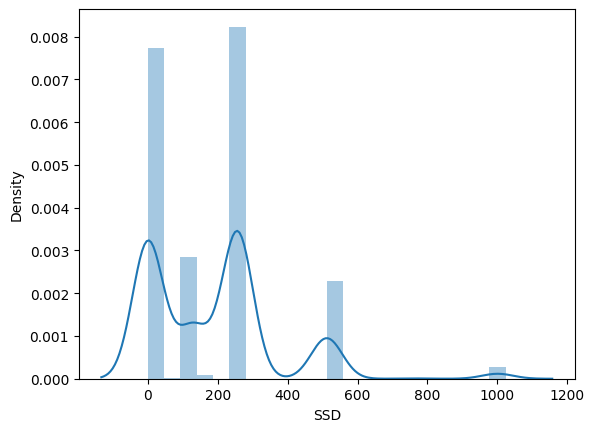

In [65]:
sns.distplot(df['SSD'])

<ipython-input-66-535a1652d471>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HDD'])


<Axes: xlabel='HDD', ylabel='Density'>

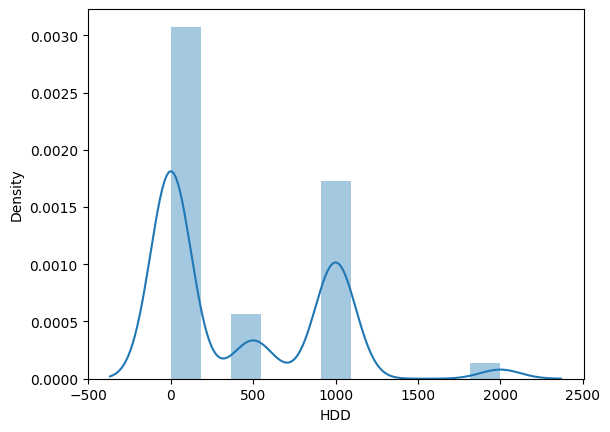

In [66]:
sns.distplot(df['HDD'])

The heatmap below encapsulates the relations between all columns,
It is a set of correlation values between all pairs of dependant and independent variables

<ipython-input-67-00491ccd23a6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

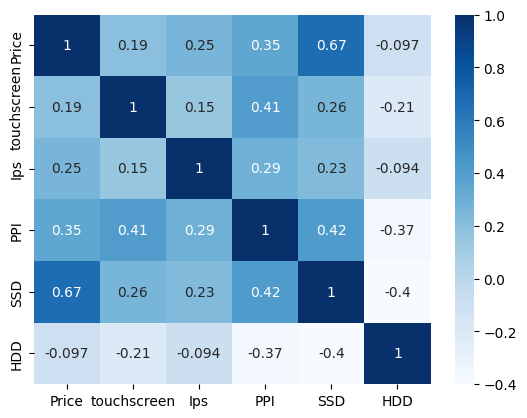

In [67]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')


In [68]:
df.head()


,Company,TypeName,Ram,Weight,Price,touchscreen,Ips,PPI,CPU_brand,GPU,OpS,SSD,HDD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,128,0
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux,256,0
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,512,0
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,256,0




---



---



---


Now EDA i.e Exploratory Data Analysis is done, we move on to fitting this data into a machine learning algorithm.


**Splitting Data and Training the Model**

In [69]:
X=df.drop(columns=['Price'])
Y=np.log(df['Price']) 
#We take log so that it becomes less skewed and whilst showing output,
#we take exponential and reverse what we had done.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15,random_state=2)

We have to make all data in numerics, so we do One Hot Encoding and convert categorical data to numeric.

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline



In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

We are pipelining the process of fitting the model, the first step in the pipeline is encoding categorical data which I've done using OneHotEncoder.

In [72]:
step1=make_column_transformer((OneHotEncoder(),['Company','TypeName','CPU_brand','GPU','OpS']),remainder='passthrough')

Below is step2, which essentially fits the RandomForestRegressor onto our training data and following that, in this cell, we print the metrics as well

In [73]:
step2=RandomForestRegressor(n_estimators=600,random_state=4,max_samples=0.65,max_features=0.85,max_depth=80)
pipe=Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)

Y_pred=pipe.predict(X_test)
print('R2 Score is ',r2_score(Y_test,Y_pred))
print('MeanAbsErr is ',mean_absolute_error(Y_test,Y_pred))

R2 Score is  0.8902419307284355
MeanAbsErr is  0.15675033042060793


MeanAbsErr is Mean Absolute Error which is the difference between predicted values and true values (test values). 
It is around 0.15 which I would say is decent meaning the difference between a particular datapoint i.e that datapoint's true and predicted value vary by only 0.15


---
R2 Score
This metric tells us how much of the variation of a dependent variable is explained by an independent variable in a regression model.

So here we have 0.89 which means 89% of the variation can be explained/predicted using the independent variables and the regression model.



---


---



---



---




---



---



***Locally Weighted Linear Regression***

This is a non-parametric regression technique which fits a non-linear line on data points.
It gives more weight to points near the 'query point' which is a point in focus and those further from it are given lesser weights.

Compared to Linear Regression where a single Weight and Bias is found for the entire set of points, here, there is not testing and training loop, the weights are dynamically found whilst testing itself.

In [74]:
X1=X
X1=pd.get_dummies(X1)
Y1=df['Price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)


We use StandardScaler to standardize the values into a stand format. This is done so as to bring the points closer to each other numerically so that the distance between them will be small.
(It is a distribution with standard deviation =1)

Scaling results in better accuracy as it makes it easy to compare values as they are close to each other and we don't need to worry about values being out of scope of each other.

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

After browsing the web for some resources, I noticed wherever people have implemented LWLR, only one independent variable and a dependant variable were used.

Due to lack of time, I decided to reduce dimensionality of X by using PCA or Principal Component Anaylsis and reduced all the variables to just one column.

Loss of information and data are likely possible but implenting LWLR was more convinient and efficient when I used PCA and reduced this dataset's dimensionality.

In [76]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 1)
 
X1_train = pca.fit_transform(X1_train)
X1_test = pca.transform(X1_test)
 
explained_variance = pca.explained_variance_ratio_

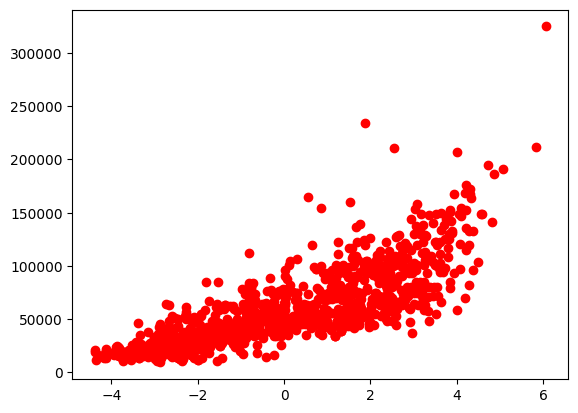

In [77]:

plt.scatter(X1_train, y1_train,  color='red')
plt.show()

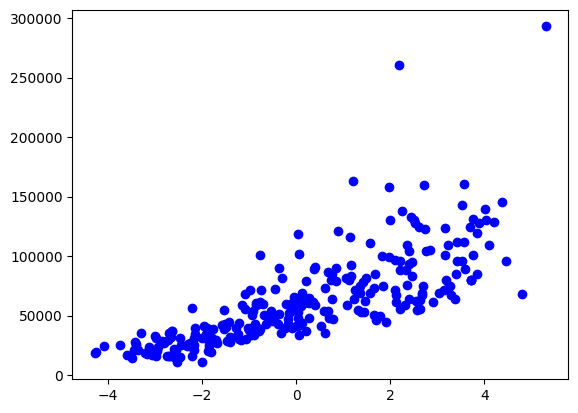

In [78]:
plt.scatter(X1_test, y1_test,  color='blue')
plt.show()

I referred to online resources and got an idea of implementing LWLR.

In [79]:
X1_train=np.insert(X1_train, 0, values=1.0, axis=1)

In [80]:
sig = 0.5
cov = np.identity(X1_train.shape[1])*sig**2

In [81]:
def get_Weight(xq):
    m = X1_train.shape[0]
    W = np.zeros((m,m))
    for i in range(0,m):
        W[i,i] = np.exp(-0.5*((X1_train[i]-xq).T).dot(np.linalg.inv(cov)).dot((X1_train[i]-xq)))  
    return W

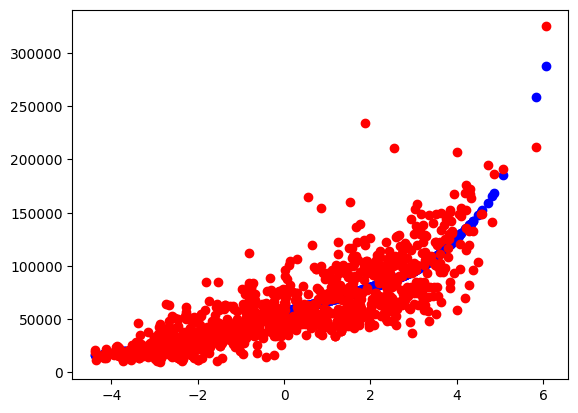

In [82]:
def predict(Xte):
    m = Xte.shape[0]
    yhat = np.zeros(m)

    for i in range(0,Xte.shape[0]):

        W = get_Weight(Xte[i])

        yi = np.linalg.inv((X1_train.T).dot(W).dot(X1_train)).dot(X1_train.T).dot(W).dot(y1_train)

        yhat[i] = Xte[i].dot(yi)
    return yhat
yhat = predict(X1_train)
plt.scatter(X1_train[:,1], yhat,  color='blue')
plt.scatter(X1_train[:,1], y1_train,  color='red')
plt.show()

In [103]:
print('R2 Score is ',r2_score(y1_train,yhat))
print('MeanAbsErr is ',mean_absolute_error(y1_train,yhat))

R2 Score is  0.6957699162003178
MeanAbsErr is  14538.154342859445


From the above plot, we see that the blue line which is the non-linear regression line has decently predicted values. The red points are the training values or true values.
My model has done a fair job in generating a regression line even after using PCA to reduce columns.

R2 score and MeanAbsError is quite undesirable as locally weighted regression is not a good choice for this kind of a large data set and since I had done PCA, a lot of information loss occured. 

*By this, it's clear that Locally Weighted Linear Regression is best suited for small datasets with less number of Independent variables.*



---



---



---



**ANN**

I have used PyTorch to implement a simple Artificial Neural Network.

we make a copy of our dataframe just to be safe as we don't want unnecessary changes to the dataset, generating ANN using this copy of dataframe is more efficient and safer.

In [83]:
data=df.copy(deep=True)

In [84]:
data.head()

,Company,TypeName,Ram,Weight,Price,touchscreen,Ips,PPI,CPU_brand,GPU,OpS,SSD,HDD
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel,Mac,128,0
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel,Mac,0,0
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel,Others/No OS/Linux,256,0
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,AMD,Mac,512,0
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel,Mac,256,0


In [85]:
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.nn.functional as F

In [86]:
#We need to encode our categorical data, whilst preprocessing for random forest, we used OneHotEncoder and for
#Locally Weighted regression ,we used pd.get_dummies()
#here we use get dummies again.

def encoder(data, column, prefix):
    data = data.copy()
    dummies = pd.get_dummies(data[column], prefix=prefix)
    data = pd.concat([data, dummies], axis=1)
    data = data.drop(column, axis=1)
    return data


We encode all categorical data using this function. Using get dummies, all categorical data has been prepared for the Neural Network.

In [87]:
data=encoder(data,'Company','company')
data=encoder(data,'TypeName','typename')
data=encoder(data,'CPU_brand','cpu brand')
data=encoder(data,'GPU','gpu')
data=encoder(data,'OpS','opsystem')

In [88]:
data.head()

,Ram,Weight,Price,touchscreen,Ips,PPI,SSD,HDD,company_Acer,company_Apple,...,cpu brand_Intel Core i3,cpu brand_Intel Core i5,cpu brand_Intel Core i7,cpu brand_Other Intel processor,gpu_AMD,gpu_Intel,gpu_Nvidia,opsystem_Mac,opsystem_Others/No OS/Linux,opsystem_Windows
0,8,1.37,71378.6832,0,1,226.983005,128,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,8,1.86,30636.0000,0,0,141.211998,256,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,16,1.83,135195.3360,0,1,220.534624,512,0,0,1,...,0,0,1,0,1,0,0,1,0,0
4,8,1.37,96095.8080,0,1,226.983005,256,0,0,1,...,0,1,0,0,0,1,0,1,0,0


In [89]:
y=data['Price'].copy()
X=data.drop('Price',axis=1).copy()
print(X.shape)

(1302, 43)


In [90]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

We define the Neural Network and it's layers and hidden layers.

Again, I referred to Pytorch Docs,Stack Overflow and an online course I am currently exploring.

In [91]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.layer1=nn.Linear(43,32)
    self.layer2=nn.Linear(32,16)
    self.out=nn.Linear(16,1)

  def forward(self,x):
    x=F.relu(self.layer1(x))
    x=F.relu(self.layer2(x))
    x=self.out(x)
    return x

net=Net()

In [92]:
tX_train=torch.tensor(X_train).type(torch.float32)
ty_train=torch.tensor(np.array(y_train)).type(torch.float32)

tX_test=torch.tensor(X_test).type(torch.float32)
ty_test=torch.tensor(np.array(y_test)).type(torch.float32)


In [93]:
optimizer=torch.optim.Adam(net.parameters(),lr=0.05)
criterion=nn.MSELoss()

Training

In [94]:
for x, target in zip(tX_train,ty_train):
  optimizer.zero_grad()
  output=net(x)
  loss=criterion(output,target)
  loss.backward()
  optimizer.step()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Calculating Loss in Testing Loop

In [95]:
totloss = 0
Op=[]

for x, target in zip(tX_test, ty_test):
    output = net(x)
    Op.append(output)
    loss = criterion(output, target)
    totloss += loss
    
average = totloss / len(tX_test)

In [96]:
rmse=torch.sqrt(average).detach().numpy()
print("RMSE for our ANN is ",rmse)

RMSE for our ANN is  25779.355


We can keep modifying parameters to get a better result, but due to constraint of time, I am stopping here, in future,i'll mostly change up some parameters to get a lower MSE Loss

RMSE of 26k is not very desired and I will definitely modify parameters and maybe try OneHotEncoding or Hash Encoding.

In [97]:
O=torch.stack(Op)

In [98]:
O=O.detach().numpy()

In [99]:
ty_test=ty_test.detach().numpy()

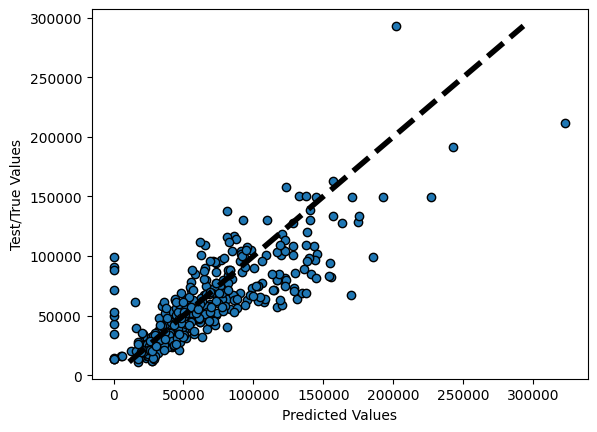

In [100]:
fig,ax=plt.subplots()
ax.scatter(O,ty_test,edgecolors=(0,0,0))
ax.plot([ty_test.min(),ty_test.max()],[ty_test.min(),ty_test.max()],'k--',lw=4)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Test/True Values')
plt.show()

In this plot, X axis and Y axis have predicted values and testing/true values respectively.
We see the points are quite close to the line, thus our predictions are quite good.

This brings us to end of this notebook.
Fully Implemented using Google Collab and LaptopData.csv from kaggle. All models are on cpu only.



---



---



---



---

